<a href="https://colab.research.google.com/github/laayrd/Projeto_PrograMaria/blob/main/Analise_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importações e Configuração Inicial

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
from scipy.stats import chi2_contingency
import sqlite3
import seaborn as sns
import plotly.express as px

In [3]:
#Montando o Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Carregamento e Exploração dos Dados

###Data Frame Principal

In [4]:
#Carregando a planilha de dados
df = pd.read_excel("/content/drive/MyDrive/Python_PrograMaria/planilha_modulo3.xlsx")

In [5]:
#Explorando os Dados

#Primeiras linhas
df.head()

,Unnamed: 0,ID,IDADE,FAIXA IDADE,GENERO,COR/RACA/ETNIA,PCD,EXPERIENCIA_PROFISSIONAL_PREJUDICADA,ASPECTOS_PREJUDICADOS,VIVE_NO_BRASIL,...,SETOR,NUMERO DE FUNCIONARIOS,GESTOR?,CARGO COMO GESTOR,CARGO ATUAL,NIVEL,FAIXA SALARIAL,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?,SALARIO
0,0,zzqzz3l9ily8nuo2m7wyzzqzz3w48o96,39.0,35-39,Masculino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Setor Público,Acima de 3.000,0.0,NaN,DBA/Administrador de Banco de Dados,Júnior,de R$ 8.001/mês a R$ 12.000/mês,de 1 a 2 anos,de 7 a 10 anos,11194.0
1,1,zzls2oftfn9law393oezzls2ofhvfpzd,32.0,30-34,Masculino,Parda,Não,"Sim, acredito que a minha a experiência profis...",Aprovação em processos seletivos/entrevistas,True,...,Outra Opção,Acima de 3.000,1.0,Supervisor/Coordenador,NaN,NaN,de R$ 4.001/mês a R$ 6.000/mês,de 3 a 4 anos,Menos de 1 ano,4695.0
2,2,zzdwqzfqqp1ypc7ps6m0hzzdwqz292yi,53.0,50-54,Masculino,Branca,Não,NaN,NaN,True,...,Finanças ou Bancos,Acima de 3.000,0.0,NaN,Desenvolvedor/ Engenheiro de Software/ Analist...,Pleno,de R$ 12.001/mês a R$ 16.000/mês,de 3 a 4 anos,Mais de 10 anos,14202.0
3,3,zzbqh3uy7yk7k9qmkzzbqtb4s9faqspl,27.0,25-29,Masculino,Branca,Não,NaN,NaN,True,...,Setor Automotivo,Acima de 3.000,0.0,NaN,Cientista de Dados/Data Scientist,Sênior,de R$ 12.001/mês a R$ 16.000/mês,de 4 a 6 anos,Não tive experiência na área de TI/Engenharia ...,15463.0
4,4,zzaf1m95yan929rb94wzzaf1mekhvhpg,46.0,45-49,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Setor Público,de 101 a 500,0.0,NaN,Desenvolvedor/ Engenheiro de Software/ Analist...,Pleno,de R$ 6.001/mês a R$ 8.000/mês,Não tenho experiência na área de dados,Mais de 10 anos,7733.0


In [6]:
#Últimas linhas
df.tail()

,Unnamed: 0,ID,IDADE,FAIXA IDADE,GENERO,COR/RACA/ETNIA,PCD,EXPERIENCIA_PROFISSIONAL_PREJUDICADA,ASPECTOS_PREJUDICADOS,VIVE_NO_BRASIL,...,SETOR,NUMERO DE FUNCIONARIOS,GESTOR?,CARGO COMO GESTOR,CARGO ATUAL,NIVEL,FAIXA SALARIAL,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?,SALARIO
4266,4266,01jnrn9f6va0menfhk2ztm01jnrn96bp,26.0,25-29,Masculino,Branca,Não,NaN,NaN,True,...,Tecnologia/Fábrica de Software,Acima de 3.000,0.0,NaN,Analista de Dados/Data Analyst,Pleno,de R$ 4.001/mês a R$ 6.000/mês,de 3 a 4 anos,de 7 a 10 anos,4329.0
4267,4267,01dyfxam4u4bi29fem01dyfxaq9akvqp,30.0,30-34,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Área de Consultoria,de 51 a 100,0.0,NaN,Engenheiro de Dados/Arquiteto de Dados/Data En...,Pleno,de R$ 3.001/mês a R$ 4.000/mês,de 1 a 2 anos,Não tive experiência na área de TI/Engenharia ...,3758.0
4268,4268,00zw9ks9d40z4u00zz3d20iix65qpli3,29.0,25-29,Masculino,Branca,Não,NaN,NaN,True,...,Setor Imobiliário/ Construção Civil,de 101 a 500,1.0,Gerente/Head,NaN,NaN,de R$ 16.001/mês a R$ 20.000/mês,de 4 a 6 anos,Não tive experiência na área de TI/Engenharia ...,19607.0
4269,4269,00xu7yujd7s57emj00xu7y0c3njix3de,NaN,17-21,Masculino,Branca,Não,NaN,NaN,True,...,Indústria,de 1.001 a 3.000,0.0,NaN,Outra Opção,Júnior,Menos de R$ 1.000/mês,Menos de 1 ano,Não tive experiência na área de TI/Engenharia ...,989.0
4270,4270,00lb35llmdsidpa00lb35qcdysnzvhv7,24.0,22-24,Masculino,Branca,Não,NaN,NaN,True,...,Agronegócios,de 501 a 1.000,0.0,NaN,Analista de Dados/Data Analyst,Júnior,de R$ 3.001/mês a R$ 4.000/mês,de 1 a 2 anos,Não tive experiência na área de TI/Engenharia ...,3079.0


In [7]:
print("Dimensões (linhas, colunas):", df.shape)

Dimensões (linhas, colunas): (4271, 28)


In [8]:
print("Número de registros (linhas):", len(df))

Número de registros (linhas): 4271


In [9]:
print("Colunas Disponíveis:", df.columns)

Colunas Disponíveis: Index(['Unnamed: 0', 'ID', 'IDADE', 'FAIXA IDADE', 'GENERO', 'COR/RACA/ETNIA',
       'PCD', 'EXPERIENCIA_PROFISSIONAL_PREJUDICADA', 'ASPECTOS_PREJUDICADOS',
       'VIVE_NO_BRASIL', 'ESTADO ONDE MORA', 'UF ONDE MORA',
       'REGIAO ONDE MORA', 'MUDOU DE ESTADO?', 'REGIAO DE ORIGEM',
       'NIVEL DE ENSINO', 'ÁREA DE FORMAÇÃO',
       'QUAL SUA SITUAÇÃO ATUAL DE TRABALHO?', 'SETOR',
       'NUMERO DE FUNCIONARIOS', 'GESTOR?', 'CARGO COMO GESTOR', 'CARGO ATUAL',
       'NIVEL', 'FAIXA SALARIAL',
       'QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?',
       'QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?',
       'SALARIO'],
      dtype='object')


In [10]:
# Informações gerais sobre o DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4271 entries, 0 to 4270
Data columns (total 28 columns):
 #   Column                                                                                                                     Non-Null Count  Dtype  
---  ------                                                                                                                     --------------  -----  
 0   Unnamed: 0                                                                                                                 4271 non-null   int64  
 1   ID                                                                                                                         4271 non-null   object 
 2   IDADE                                                                                                                      4197 non-null   float64
 3   FAIXA IDADE                                                                                                                4271 

In [11]:
# Estatísticas descritivas básicas
df.describe()

,Unnamed: 0,IDADE,MUDOU DE ESTADO?,GESTOR?,SALARIO
count,4271.000000,4197.000000,4171.000000,3694.000000,3694.000000
mean,2135.000000,31.169168,0.806281,0.193016,10969.266919
std,1233.075829,6.902803,0.395258,0.394719,19419.753189
min,0.000000,18.000000,0.000000,0.000000,35.000000
25%,1067.500000,26.000000,1.000000,0.000000,4269.500000
50%,2135.000000,30.000000,1.000000,0.000000,7625.500000
75%,3202.500000,35.000000,1.000000,0.000000,12778.500000
max,4270.000000,54.000000,1.000000,1.000000,485191.000000


###Data Frame Secundário

In [12]:
#Carregando os dados auxiliares para o Engenering Feature
df2 = pd.read_excel("/content/drive/MyDrive/Python_PrograMaria/Planilha_Aula_parte2.xlsx")

In [13]:
#Explorando os dados
df2.head()

,ID,Quanto tempo de experiência na área de dados você tem?,Quanto tempo de experiência na área de TI/Engenharia de Software você teve antes de começar a trabalhar na área de dados?,Você está satisfeito na sua empresa atual?,Qual o principal motivo da sua insatisfação com a empresa atual?,Você participou de entrevistas de emprego nos últimos 6 meses?,Você pretende mudar de emprego nos próximos 6 meses?,Quais os principais critérios que você leva em consideração no momento de decidir onde trabalhar?,Atualmente qual a sua forma de trabalho?,Qual a forma de trabalho ideal para você?,Caso sua empresa decida pelo modelo 100% presencial qual será sua atitude?,Sua empresa passu por Layoff em 2022?,Atuacao,Quais das linguagens listadas abaixo você utiliza no trabalho?
0,zzqzz3l9ily8nuo2m7wyzzqzz3w48o96,de 1 a 2 anos,de 7 a 10 anos,True,NaN,Não participei de entrevistas de emprego/proce...,Não estou buscando e não pretendo mudar de emp...,Benefícios,Modelo 100% presencial,Modelo híbrido com dias fixos de trabalho pres...,Vou aceitar e retornar ao modelo 100% presencial,Não ocorreram layoffs/demissões em massa na em...,Engenharia de Dados,SQL
1,zzls2oftfn9law393oezzls2ofhvfpzd,de 3 a 4 anos,Menos de 1 ano,False,Falta de oportunidade de crescimento no empreg...,"Sim, fiz entrevistas mas não fui aprovado",Estou em busca de oportunidades dentro ou fora...,"Remuneração/Salário, Plano de carreira e oport...",Modelo 100% presencial,Modelo híbrido flexível (o funcionário tem lib...,Vou aceitar e retornar ao modelo 100% presencial,Não ocorreram layoffs/demissões em massa na em...,Gestor,NaN
2,zzdwqzfqqp1ypc7ps6m0hzzdwqz292yi,de 3 a 4 anos,Mais de 10 anos,False,Falta de oportunidade de crescimento no empreg...,Não participei de entrevistas de emprego/proce...,"Não estou buscando, mas me considero aberto a ...","Remuneração/Salário, Flexibilidade de trabalho...",Modelo híbrido com dias fixos de trabalho pres...,Modelo híbrido flexível (o funcionário tem lib...,Vou procurar outra oportunidade no modelo híbr...,Não ocorreram layoffs/demissões em massa na em...,desenvolve modelos preditivos e algoritmos de...,1
3,zzbqh3uy7yk7k9qmkzzbqtb4s9faqspl,de 4 a 6 anos,Não tive experiência na área de TI/Engenharia ...,True,NaN,"Sim, fui aprovado e mudei de emprego","Não estou buscando, mas me considero aberto a ...","Remuneração/Salário, Flexibilidade de trabalho...",Modelo híbrido flexível (o funcionário tem lib...,Modelo híbrido flexível (o funcionário tem lib...,Vou procurar outra oportunidade no modelo híbr...,Não ocorreram layoffs/demissões em massa na em...,desenvolve modelos preditivos e algoritmos de...,0
4,zzaf1m95yan929rb94wzzaf1mekhvhpg,Não tenho experiência na área de dados,Mais de 10 anos,False,Falta de oportunidade de crescimento no empreg...,Não participei de entrevistas de emprego/proce...,"Não estou buscando, mas me considero aberto a ...","Remuneração/Salário, Oportunidade de aprendiza...",Modelo 100% presencial,Modelo 100% presencial,Vou aceitar e retornar ao modelo 100% presencial,Não ocorreram layoffs/demissões em massa na em...,Outra atuação,SQL


In [14]:
#ultimas linhas
df2.tail()

,ID,Quanto tempo de experiência na área de dados você tem?,Quanto tempo de experiência na área de TI/Engenharia de Software você teve antes de começar a trabalhar na área de dados?,Você está satisfeito na sua empresa atual?,Qual o principal motivo da sua insatisfação com a empresa atual?,Você participou de entrevistas de emprego nos últimos 6 meses?,Você pretende mudar de emprego nos próximos 6 meses?,Quais os principais critérios que você leva em consideração no momento de decidir onde trabalhar?,Atualmente qual a sua forma de trabalho?,Qual a forma de trabalho ideal para você?,Caso sua empresa decida pelo modelo 100% presencial qual será sua atitude?,Sua empresa passu por Layoff em 2022?,Atuacao,Quais das linguagens listadas abaixo você utiliza no trabalho?
4266,01jnrn9f6va0menfhk2ztm01jnrn96bp,de 3 a 4 anos,de 7 a 10 anos,True,NaN,"Sim, fui aprovado e mudei de emprego",Não estou buscando e não pretendo mudar de emp...,"Remuneração/Salário, Benefícios, Flexibilidade...",Modelo 100% remoto,Modelo híbrido flexível (o funcionário tem lib...,Vou procurar outra oportunidade no modelo híbr...,Não ocorreram layoffs/demissões em massa na em...,Análise de Dados,SQL
4267,01dyfxam4u4bi29fem01dyfxaq9akvqp,de 1 a 2 anos,Não tive experiência na área de TI/Engenharia ...,True,NaN,Não participei de entrevistas de emprego/proce...,Não estou buscando e não pretendo mudar de emp...,"Ambiente e clima de trabalho, Plano de carreir...",Modelo 100% remoto,Modelo híbrido flexível (o funcionário tem lib...,Vou aceitar e retornar ao modelo 100% presencial,Não ocorreram layoffs/demissões em massa na em...,Engenharia de Dados,"SQL, Python"
4268,00zw9ks9d40z4u00zz3d20iix65qpli3,de 4 a 6 anos,Não tive experiência na área de TI/Engenharia ...,True,NaN,"Sim, fui aprovado mas decidi não mudar de emprego","Não estou buscando, mas me considero aberto a ...","Remuneração/Salário, Ambiente e clima de traba...",Modelo híbrido com dias fixos de trabalho pres...,Modelo híbrido flexível (o funcionário tem lib...,Vou procurar outra oportunidade no modelo híbr...,"Sim, ocorreram layoffs/demissões em massa na e...",Gestor,NaN
4269,00xu7yujd7s57emj00xu7y0c3njix3de,Menos de 1 ano,Não tive experiência na área de TI/Engenharia ...,True,NaN,Não participei de entrevistas de emprego/proce...,Estou em busca de oportunidades dentro ou fora...,Oportunidade de aprendizado e trabalhar com re...,Modelo 100% presencial,Modelo 100% presencial,Vou aceitar e retornar ao modelo 100% presencial,Não ocorreram layoffs/demissões em massa na em...,Outra atuação,"Python, SQL"
4270,00lb35llmdsidpa00lb35qcdysnzvhv7,de 1 a 2 anos,Não tive experiência na área de TI/Engenharia ...,False,"Salário atual não corresponde ao mercado, Falt...","Sim, fiz entrevistas mas não fui aprovado",Estou em busca de oportunidades dentro ou fora...,"Remuneração/Salário, Oportunidade de aprendiza...",Modelo 100% remoto,Modelo 100% remoto,Vou procurar outra oportunidade no modelo 100%...,Não ocorreram layoffs/demissões em massa na em...,Análise de Dados,SQL


In [15]:
print("Dimensões (linhas, colunas):", df2.shape)

Dimensões (linhas, colunas): (4271, 14)


In [16]:
print("Número de registros (linhas):", len(df2))

Número de registros (linhas): 4271


In [17]:
print("Colunas Disponíveis:", df2.columns)

Colunas Disponíveis: Index(['ID', 'Quanto tempo de experiência na área de dados você tem?',
       'Quanto tempo de experiência na área de TI/Engenharia de Software você teve antes de começar a trabalhar na área de dados?',
       'Você está satisfeito na sua empresa atual?',
       'Qual o principal motivo da sua insatisfação com a empresa atual?',
       'Você participou de entrevistas de emprego nos últimos 6 meses?',
       'Você pretende mudar de emprego nos próximos 6 meses?',
       'Quais os principais critérios que você leva em consideração no momento de decidir onde trabalhar?',
       'Atualmente qual a sua forma de trabalho?',
       'Qual a forma de trabalho ideal para você?',
       'Caso sua empresa decida pelo modelo 100% presencial qual será sua atitude?',
       'Sua empresa passu por Layoff em 2022?', 'Atuacao',
       'Quais das linguagens listadas abaixo você utiliza no trabalho?'],
      dtype='object')


In [18]:
# Informações gerais sobre o DataFrame
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4271 entries, 0 to 4270
Data columns (total 14 columns):
 #   Column                                                                                                                     Non-Null Count  Dtype 
---  ------                                                                                                                     --------------  ----- 
 0   ID                                                                                                                         4271 non-null   object
 1   Quanto tempo de experiência na área de dados você tem?                                                                     3694 non-null   object
 2   Quanto tempo de experiência na área de TI/Engenharia de Software você teve antes de começar a trabalhar na área de dados?  3694 non-null   object
 3   Você está satisfeito na sua empresa atual?                                                                                 3694 non-n

In [19]:
# Estatísticas descritivas básicas
df2.describe()

,ID,Quanto tempo de experiência na área de dados você tem?,Quanto tempo de experiência na área de TI/Engenharia de Software você teve antes de começar a trabalhar na área de dados?,Você está satisfeito na sua empresa atual?,Qual o principal motivo da sua insatisfação com a empresa atual?,Você participou de entrevistas de emprego nos últimos 6 meses?,Você pretende mudar de emprego nos próximos 6 meses?,Quais os principais critérios que você leva em consideração no momento de decidir onde trabalhar?,Atualmente qual a sua forma de trabalho?,Qual a forma de trabalho ideal para você?,Caso sua empresa decida pelo modelo 100% presencial qual será sua atitude?,Sua empresa passu por Layoff em 2022?,Atuacao,Quais das linguagens listadas abaixo você utiliza no trabalho?
count,4271,3694,3694,3694,960,3694,3694,3694,3694,3694,3694,3694,4271,2981
unique,4270,7,7,2,221,4,4,462,4,4,3,3,6,208
top,x4w2zctsfwfqh3q8aphgx4w2zflx9d1u,de 1 a 2 anos,Não tive experiência na área de TI/Engenharia ...,True,Gostaria de trabalhar em em outra área de atuação,Não participei de entrevistas de emprego/proce...,"Não estou buscando, mas me considero aberto a ...","Remuneração/Salário, Benefícios, Flexibilidade...",Modelo 100% remoto,Modelo híbrido flexível (o funcionário tem lib...,Vou procurar outra oportunidade no modelo híbr...,Não ocorreram layoffs/demissões em massa na em...,Análise de Dados,"SQL, Python"
freq,2,980,1605,2734,112,1672,1354,216,1689,1939,1626,3000,1326,749


#Tratamento de Dados Faltantes

####Análise da Coluna GENÊRO e preenchimento de valores faltantes

In [20]:
df.groupby("GENERO", dropna=False)["ID"].nunique()

,ID
GENERO,
Feminino,1055
Masculino,3194
Prefiro não informar,12
NaN,9


In [21]:
df["GENERO"] = df["GENERO"].fillna("Prefiro não informar")

####Análise da Coluna IDADE e preenchimento de valores faltantes

In [22]:
df["IDADE"].isnull().value_counts()

,count
IDADE,
False,4197
True,74


In [23]:
#Preenchendo os dados vazios sobre IDADE com a média da faixa etária correspondente
media_17_21 = df[df["FAIXA IDADE"] == "17-21"]["IDADE"].mean()
df.loc[(df["FAIXA IDADE"] == "17-21") & (df["IDADE"].isnull()), "IDADE"] = int(media_17_21)

In [24]:
#Preenchendo os dados vazios sobre IDADE da faixa etária 55+ com a média geral
media_geral = df["IDADE"].mean()
df.loc[(df["FAIXA IDADE"] == "55+") & (df["IDADE"].isnull()), "IDADE"] = int(media_geral)

###Análise da Coluna SALÁRIO e preenchimento de valores faltantes

In [25]:
df["SALARIO"].isnull().value_counts()

,count
SALARIO,
False,3694
True,577


In [26]:
df[df["SALARIO"].isnull()]["FAIXA SALARIAL"].value_counts()

,count
FAIXA SALARIAL,


In [27]:
#Preenchendo os dados de SALÁRIOS faltantes com a médiana
mediana_salario = df["SALARIO"].median()
df.loc[df["SALARIO"].isnull(), "SALARIO"] = mediana_salario

#Análise Descritiva e Estatísticas Básicas

In [28]:
#Análise geral das IDADES
print("Média de idades:", df['IDADE'].mean())
print("Mediana de idades:", df['IDADE'].median())
print("Desvio padrão da idade:", df['IDADE'].std())
print("Moda da Idade:", df["IDADE"].mode())
print("Variância da Idade:", df["IDADE"].var())
print("Valor Máximo da Idade:", df["IDADE"].max())
print("Valor Mínimo da Idade:", df["IDADE"].min())

Média de idades: 31.150784359634745
Mediana de idades: 30.0
Desvio padrão da idade: 6.855533242256926
Moda da Idade: 0    31.0
Name: IDADE, dtype: float64
Variância da Idade: 46.99833603568975
Valor Máximo da Idade: 54.0
Valor Mínimo da Idade: 18.0


In [29]:
#Média de Idades por Genêro
print("Média de idades por gênero (Feminino):", df[df["GENERO"] == "Feminino"]["IDADE"].mean())
print("Média de idades por gênero (Masculino):", df[df["GENERO"] == "Masculino"]["IDADE"].mean())

Média de idades por gênero (Feminino): 31.294507575757574
Média de idades por gênero (Masculino): 31.134627426424547


In [30]:
#Análise Salárial Geral
print("Média salarial geral:", df["SALARIO"].mean())
print("Mediana salarial geral:", df["SALARIO"].median())
print("Desvio padrão salarial geral:", df["SALARIO"].std())
print("Moda salarial geral:", df["SALARIO"].mode())
print("Variância salarial geral:", df["SALARIO"].var())
print("Valor Máximo salarial geral:", df["SALARIO"].max())
print("Valor Mínimo salarial geral:", df["SALARIO"].min())

Média salarial geral: 10517.53348162023
Mediana salarial geral: 7625.5
Desvio padrão salarial geral: 18096.21098911858
Moda salarial geral: 0    7625.5
Name: SALARIO, dtype: float64
Variância salarial geral: 327472852.162696
Valor Máximo salarial geral: 485191.0
Valor Mínimo salarial geral: 35.0


In [31]:
#Média Salárial por GENÊRO
print("Média salarial por gênero (Feminino):", df[df["GENERO"] == "Feminino"]["SALARIO"].mean())
print("Média salarial por gênero (Masculino):", df[df["GENERO"] == "Masculino"]["SALARIO"].mean())

Média salarial por gênero (Feminino): 8504.556818181818
Média salarial por gênero (Masculino): 11206.075140889167


#Detectando e Corrigindo Outliers

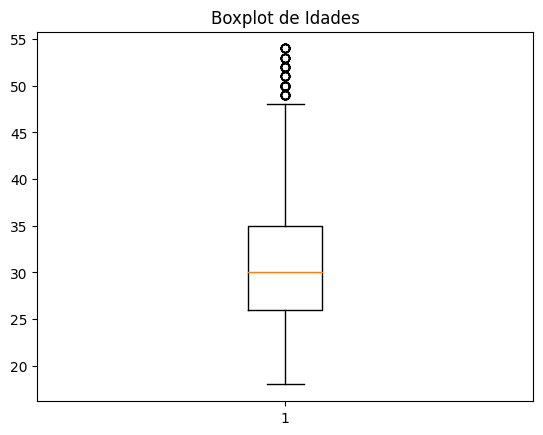

In [32]:
#Plotando o gráfico para vizualização de Outliers para IDADE
plt.boxplot(df["IDADE"])
plt.title("Boxplot de Idades")
plt.show()

In [33]:
#Vizualizando total por FAIXA SALARIAL
df["FAIXA SALARIAL"].value_counts()

,count
FAIXA SALARIAL,
de R$ 8.001/mês a R$ 12.000/mês,752
de R$ 4.001/mês a R$ 6.000/mês,584
de R$ 6.001/mês a R$ 8.000/mês,527
de R$ 12.001/mês a R$ 16.000/mês,437
de R$ 3.001/mês a R$ 4.000/mês,303
de R$ 2.001/mês a R$ 3.000/mês,285
de R$ 16.001/mês a R$ 20.000/mês,229
de R$ 1.001/mês a R$ 2.000/mês,216
de R$ 20.001/mês a R$ 25.000/mês,134


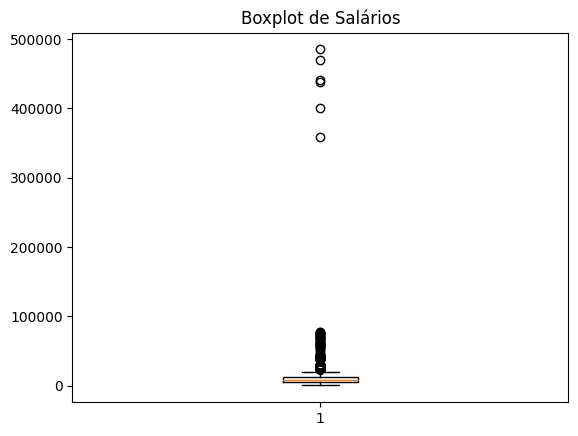

In [34]:
#Plotando o gráfico para vizualização de Outliers para SALÁRIO
plt.boxplot(df["SALARIO"])
plt.title("Boxplot de Salários")
plt.show()

In [35]:
#Estátisticas referentes ao SALÁRIO
media_salario = df["SALARIO"].mean()
print("Média Salarial:", media_salario)
desvio_salario = df["SALARIO"].std()
print("Desvio Padrão Salarial:", desvio_salario)

Média Salarial: 10517.53348162023
Desvio Padrão Salarial: 18096.21098911858


In [36]:
# Detectando e corrigindo outliers nos SALÁRIOS (quartis)
Q1 = df["SALARIO"].quantile(0.25)
print("Q1:", Q1)
Q3 = df["SALARIO"].quantile(0.75)
print("Q3:", Q3)
IQR = Q3 - Q1
print("IQR:", IQR)

Q1: 4751.5
Q3: 11794.5
IQR: 7043.0


In [37]:
limite_superior = media_salario + (3 * desvio_salario)
print("Limite Superior:", limite_superior)

Limite Superior: 64806.166448975964


In [38]:
# Corrigindo outliers da FAIXA SALARIAL "Acima de R$ 40.001/mês"
media_40mais = round(df[(df["FAIXA SALARIAL"] == "Acima de R$ 40.001/mês") & (df["SALARIO"] < limite_superior)]["SALARIO"].mean() , 2)
df["SALARIO"] = np.where((df["SALARIO"] > limite_superior), media_40mais, df["SALARIO"])
print(media_40mais)

53127.85


In [39]:
#Verificando maior salário após tratamento
print("Max:", df["SALARIO"].max())

Max: 63813.0


#Intervalo de Confiança para SALÁRIOS

In [40]:
#calculando a média e o desvio padrão amostral dos Salários
media_amostral = np.mean(df["SALARIO"])
print("Média Amostral:", media_amostral)
desvio_amostral = np.std(df["SALARIO"])
print("Desvio Padrão Amostral:", desvio_amostral)

Média Amostral: 9914.31215172091
Desvio Padrão Amostral: 8349.18286776598


In [41]:
#Definindo o nível de confiança e tamanho da amostra
nivel_confianca = 0.95
tamanho_amostra = len(df["SALARIO"])
print("Tamanho da Amostra:", tamanho_amostra)

Tamanho da Amostra: 4271


In [42]:
# Erro padrão
erro_padrao = st.sem(df["SALARIO"])
print("Erro Padrão:", erro_padrao)

Erro Padrão: 127.77033567700946


In [43]:
# Calculando o intervalo de confiança
intervalo_confianca = st.t.interval(nivel_confianca, tamanho_amostra - 1, loc=media_amostral, scale=erro_padrao)
print("Intervalo de confiança para o salário (95%):", intervalo_confianca)

Intervalo de confiança para o salário (95%): (9663.815890731736, 10164.808412710083)


#Featuring Engeneering

In [44]:
# Criando nova coluna "NOVO NIVEL" para diferenciar gestores de não gestores
def preencher_nivel(gestor, nivel):
    if gestor == 1:
        return "Pessoa Gestora"
    else:
        return nivel

In [45]:
df["NOVO NIVEL"] = df.apply(lambda x: preencher_nivel(x["GESTOR?"], x["NIVEL"]), axis=1)
print(df["NOVO NIVEL"].value_counts())

NOVO NIVEL
Pleno             1060
Júnior            1023
Sênior             898
Pessoa Gestora     713
Name: count, dtype: int64


In [46]:
# Criando nova coluna "GERACAO" com base na idade
def determinar_geracao(idade):
    if 39 < idade <= 58:
        return "Geração X"
    elif 29 < idade <= 39:
        return "Millennials"
    elif 13 < idade <= 29:
        return "Geração Z"
    else:
        return "Outra Geração"

In [47]:
df["GERACAO"] = df["IDADE"].apply(determinar_geracao)
print(df["GERACAO"].value_counts())

GERACAO
Geração Z      1999
Millennials    1761
Geração X       511
Name: count, dtype: int64


In [48]:
#Realizando o merge com o Data Frame Secundário (df e df2) utilizando a coluna ID como chave e mantendo todas as linhas do Data Frame Principal
df = df.merge(df2, on="ID", how="left")

In [49]:
#Vizualizando o Data Frame após o merge
df.columns

Index(['Unnamed: 0', 'ID', 'IDADE', 'FAIXA IDADE', 'GENERO', 'COR/RACA/ETNIA',
       'PCD', 'EXPERIENCIA_PROFISSIONAL_PREJUDICADA', 'ASPECTOS_PREJUDICADOS',
       'VIVE_NO_BRASIL', 'ESTADO ONDE MORA', 'UF ONDE MORA',
       'REGIAO ONDE MORA', 'MUDOU DE ESTADO?', 'REGIAO DE ORIGEM',
       'NIVEL DE ENSINO', 'ÁREA DE FORMAÇÃO',
       'QUAL SUA SITUAÇÃO ATUAL DE TRABALHO?', 'SETOR',
       'NUMERO DE FUNCIONARIOS', 'GESTOR?', 'CARGO COMO GESTOR', 'CARGO ATUAL',
       'NIVEL', 'FAIXA SALARIAL',
       'QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?',
       'QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?',
       'SALARIO', 'NOVO NIVEL', 'GERACAO',
       'Quanto tempo de experiência na área de dados você tem?',
       'Quanto tempo de experiência na área de TI/Engenharia de Software você teve antes de começar a trabalhar na área de dados?',
       'Você está satisfeito na sua empresa atual?',
       '

###Realizando a Análise sobre a intenção de Mudar de emprego

In [50]:
# Contando as respostas na coluna "Você pretende mudar de emprego nos próximos 6 meses?"
df['Você pretende mudar de emprego nos próximos 6 meses?'].value_counts()

,count
Você pretende mudar de emprego nos próximos 6 meses?,
"Não estou buscando, mas me considero aberto a outras oportunidades",1354
Estou em busca de oportunidades dentro ou fora do Brasil,1011
Não estou buscando e não pretendo mudar de emprego nos próximos 6 meses,978
"Estou em busca de oportunidades, mas apenas fora do Brasil",353


In [51]:
#Criando uma coluna sobre a "Probabilidade de Mudar de Emprego"
df["Probabilidade de Mudar de Emprego"] = df["Você pretende mudar de emprego nos próximos 6 meses?"].str.contains("em busca", case=False)

In [52]:
# Contando quantos funcionários possuem alta ou baixa probabilidade de mudar de emprego
df["Probabilidade de Mudar de Emprego"].value_counts()

,count
Probabilidade de Mudar de Emprego,
False,2332
True,1364


In [53]:
#Criando coluna sobre "Aberto a Oportunidades"
df["Aberto a oportunidades"] = df["Você pretende mudar de emprego nos próximos 6 meses?"].str.contains("aberto", case=False)

In [54]:
#Contando quantas pessoas estão abertas a oportunidades
df["Aberto a oportunidades"].value_counts()

,count
Aberto a oportunidades,
False,2342
True,1354


#Análise de Correlação

In [55]:
# Correlação entre idade e salário (variáveis contínuas)
correlacao_continua = df["IDADE"].corr(df["SALARIO"])
print("Correlação entre idade e salário:", correlacao_continua)

Correlação entre idade e salário: 0.28937841529921254


In [56]:
# Cálculo do coeficiente de Cramer (variáveis categóricas)
def crawmer_coeficiente (coluna1, coluna2):
  tabela_cruzada = np.array(pd.crosstab(coluna1, coluna2))
  chi2 = chi2_contingency(tabela_cruzada)[0]
  soma = np.sum(tabela_cruzada)
  mini = min(tabela_cruzada.shape)-1
  cramer = np.sqrt(chi2/(soma*mini))
  return cramer

In [57]:
# Correlação entre "COR/RACA/ETNIA" & "NIVEL DE ENSINO"
cramer_cor_raca_nivel = crawmer_coeficiente(df["COR/RACA/ETNIA"], df["NIVEL DE ENSINO"])
print("Coeficiente de Cramer entre cor/raça e nível de ensino:", cramer_cor_raca_nivel)

Coeficiente de Cramer entre cor/raça e nível de ensino: 0.04499106580480143


In [58]:
#Gerando Tabela Cruzada entre "COR/RACA/ETNIA" & "NIVEL DE ENSINO" e convertendo em um array para melhor vizualização
tabela_cruzada = pd.crosstab(df["COR/RACA/ETNIA"], df["NIVEL DE ENSINO"])
np.array(tabela_cruzada)

array([[  7,  15,  50,  14,   2,   0,  40],
       [127, 365, 999, 355,  65,   8, 827],
       [  0,   2,   4,   2,   0,   0,   3],
       [  0,   0,   6,   3,   1,   0,   7],
       [ 50, 178, 333, 113,  33,   3, 344],
       [  1,   2,  14,   1,   0,   1,   7],
       [  6,  51, 104,  33,   9,   0,  88]])

In [59]:
#Correlação entre "NIVEL DE ENSINO" & "GENERO"
crawmer_nivel_ensino_genero = crawmer_coeficiente(df["NIVEL DE ENSINO"], df["GENERO"])
print("Coeficiente de Cramer entre nível de ensino e gênero:", crawmer_nivel_ensino_genero)

Coeficiente de Cramer entre nível de ensino e gênero: 0.076119232802818


In [60]:
#Gerando Tabela Cruzada entre "NIVEL DE ENSINO" & "GENERO"
tabela_cruzada2 = pd.crosstab(df["NIVEL DE ENSINO"], df["GENERO"])
print(tabela_cruzada2)

GENERO                      Feminino  Masculino  Prefiro não informar
NIVEL DE ENSINO                                                      
Doutorado ou Phd                  57        134                     0
Estudante de Graduação           104        506                     3
Graduação/Bacharelado            365       1138                     7
Mestrado                         133        386                     2
Não tenho graduação formal        24         86                     0
Prefiro não informar               3          8                     1
Pós-graduação                    372        936                     8


#Exportação do DataFrame final para CSV

In [61]:
df.to_csv("/content/drive/MyDrive/Python_PrograMaria/analise_dados.csv", float_format='%.2f', index=False)

#Conectando SQL com Pandas

In [62]:
#Conectando ao banco de Dados SQLite
conexao = sqlite3.connect("/content/drive/MyDrive/Python_PrograMaria/satatus_brasil")

In [63]:
#Carregando o arquivo CSV
df3 = pd.read_csv("/content/drive/MyDrive/Python_PrograMaria/analise_dados.csv")

In [64]:
#Lista dos estados únicos do DataFrame
estados_list = list(df["UF ONDE MORA"].unique())

In [65]:
#Query para buscar a média de renda e educação dos Estados
query = """
        SELECT Municipios_Brasileiros.Estado, AVG(Municipio_status.Renda) AS Media_Renda, AVG(Municipio_status.Educacao) AS Media_Educacao
        FROM Municipios_Brasileiros
        INNER JOIN Municipio_status ON Municipios_Brasileiros.municipio_ID = Municipio_status.municipio_ID
        WHERE Municipios_Brasileiros.Estado IN ({})
        GROUP BY Municipios_Brasileiros.Estado;
        """.format(','.join(['?' for _ in estados_list]))

In [66]:
#Executando a query e armazenando o resultado em um DataFrame
estados_renda_educacao = pd.read_sql(query, conexao, params = estados_list)

In [67]:
#Renomeando a coluna do DataFrame 3
df3.rename(columns={"UF ONDE MORA": "Estado"}, inplace=True)

In [68]:
#Verificando a mudança
df3.columns

Index(['Unnamed: 0', 'ID', 'IDADE', 'FAIXA IDADE', 'GENERO', 'COR/RACA/ETNIA',
       'PCD', 'EXPERIENCIA_PROFISSIONAL_PREJUDICADA', 'ASPECTOS_PREJUDICADOS',
       'VIVE_NO_BRASIL', 'ESTADO ONDE MORA', 'Estado', 'REGIAO ONDE MORA',
       'MUDOU DE ESTADO?', 'REGIAO DE ORIGEM', 'NIVEL DE ENSINO',
       'ÁREA DE FORMAÇÃO', 'QUAL SUA SITUAÇÃO ATUAL DE TRABALHO?', 'SETOR',
       'NUMERO DE FUNCIONARIOS', 'GESTOR?', 'CARGO COMO GESTOR', 'CARGO ATUAL',
       'NIVEL', 'FAIXA SALARIAL',
       'QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?',
       'QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?',
       'SALARIO', 'NOVO NIVEL', 'GERACAO',
       'Quanto tempo de experiência na área de dados você tem?',
       'Quanto tempo de experiência na área de TI/Engenharia de Software você teve antes de começar a trabalhar na área de dados?',
       'Você está satisfeito na sua empresa atual?',
       'Qual o princi

In [69]:
#Calculando a correlação entre salário e renda
correlacao_renda_salario = df3["SALARIO"].corr(estados_renda_educacao["Media_Renda"])
print("Correlação entre salário e renda:", correlacao_renda_salario)

Correlação entre salário e renda: -0.15859512793375552


In [70]:
#Calculando a correlação entre salário e educação
correlacao_renda_educacao = df3["SALARIO"].corr(estados_renda_educacao["Media_Educacao"])
print("Correlação entre salário e educação:", correlacao_renda_educacao)

Correlação entre salário e educação: -0.1141070853307146


#Vizualização de Dados

In [71]:
genero_counts = df3["GENERO"].value_counts()

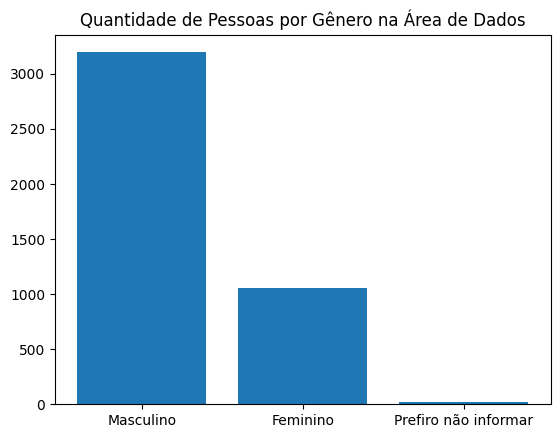

In [72]:
plt.figure()
plt.bar(height = genero_counts.values, x = genero_counts.index)
plt.title("Quantidade de Pessoas por Gênero na Área de Dados")
plt.show()

<ipython-input-73-1c79a13c27a0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df3, x="GENERO", palette = "pastel")


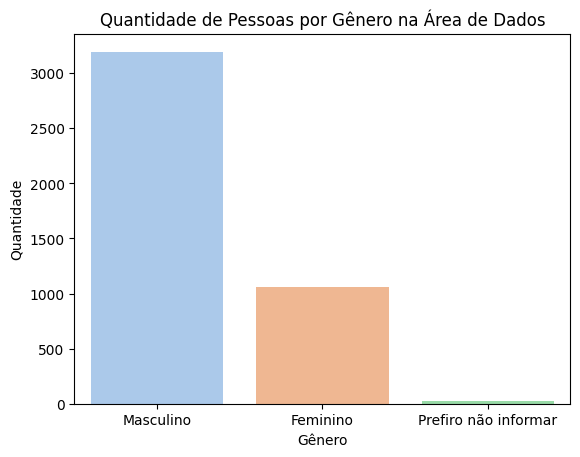

In [73]:
plt.figure()
sns.countplot(data=df3, x="GENERO", palette = "pastel")
plt.title("Quantidade de Pessoas por Gênero na Área de Dados")
plt.xlabel("Gênero")
plt.ylabel("Quantidade")
plt.show()

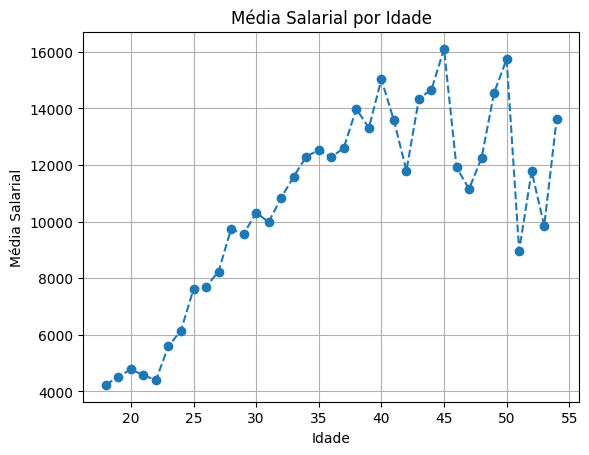

In [76]:
salario_idade = df3.groupby("IDADE")["SALARIO"].mean()

plt.figure()
plt.plot(salario_idade.index, salario_idade.values, marker="o", linestyle="--")
plt.xlabel("Idade")
plt.ylabel("Média Salarial")
plt.title("Média Salarial por Idade")
plt.grid(True)
plt.show()

In [77]:
fig = px.line(salario_idade.reset_index(), x = "IDADE", y= "SALARIO", title= "Média Salarial por Idade", markers=True)
fig.show()

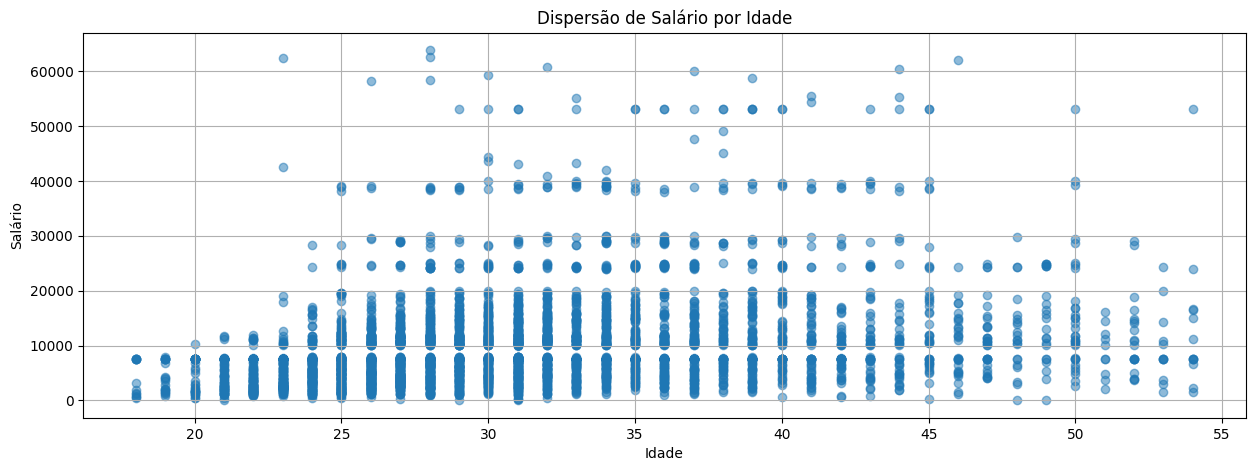

In [78]:
plt.figure(figsize=(15, 5))
plt.scatter(df3["IDADE"], df3["SALARIO"], alpha=0.5)
plt.title("Dispersão de Salário por Idade")
plt.xlabel("Idade")
plt.ylabel("Salário")
plt.grid(True)
plt.show()

In [79]:
fig = px.scatter(df3, x="IDADE", y= "SALARIO", title= "Dispersão de Salário por Idade")
fig.show()